In [1]:
%matplotlib inline

In [2]:
import os
os.getcwd()

'/Users/gopal/Desktop/AllStuffData/notebooks'

In [3]:
from datetime import datetime, date, timedelta
import matplotlib as mpl
import dateutil
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams
import seaborn as sns
import locale
import pandas as pd
import requests
from pandas import ExcelWriter

In [4]:
sns.set(style='ticks')
# pal = sns.color_palette([
#     [31 / 255, 73 / 255, 125 / 255], #JPMBlue
#     [247 / 255, 150 / 255, 70 / 255], #JPMOrange
#     [155 / 255, 187 / 255, 89 / 255] #JPMGreen
# ])

pal = sns.color_palette([
    [222 / 255, 110 / 255, 116 / 255], #JPMBlue
    [101 / 255, 134 / 255, 194 / 255], #JPMOrange
    [43 / 255, 175 / 255, 100 / 255], #JPMGreen
        [224 / 255, 120 / 255, 57 / 255], #Orange
        [205 / 255, 51 / 255, 60 / 255], #Red
        [0 / 255, 162 / 255, 88 / 255], #Green
        [51 / 255, 103 / 255, 171 / 255], #Blue
])

pal1 = sns.color_palette([
        [230 / 255, 152 / 255, 158 / 255], #Light Red
        [205 / 255, 51 / 255, 60 / 255], #Red
        [157 / 255, 187 / 255, 226 / 255], #Light Blue
        [51 / 255, 103 / 255, 171 / 255], #Blue
        [0 / 255, 230 / 255, 126 / 255], #Light Green
        [0 / 255, 162 / 255, 88 / 255], #Green

])

linestyles = [
    {'c': pal[0], 'linestyle': '-'}, 
    {'c': pal[1], 'linestyle': '-'}, 
    {'c': pal[0], 'linestyle': 'dashed'}, 
    {'c': pal[1], 'linestyle': 'dashed'}, 
    {'c': pal[0], 'linestyle': ':'}, 
    {'c': pal[1], 'linestyle': ':'}, 
    {'c': pal[2], 'linestyle': '-'}, 
    {'c': pal[2], 'linestyle': 'dashed'}, 
    {'c': pal[2], 'linestyle': ':'}, 
    
]

barstyles = [
    {'color': pal[0], },
    {'color': pal[0], },
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '////'},
    {'edgecolor': pal[0], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    {'edgecolor': pal[1], 'color': 'white', 'linewidth': 1, 'hatch': '....'},
    
]

rcParams = {
    'font.family' : 'sans-serif',
    'font.sans-serif' : 'Arial',
    'font.weight' : 'bold',
    'font.stretch' : 'condensed',
    'figure.autolayout' : False,
    'hatch.linewidth' : 0.2
}

csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
# Plantagenet Cherokee

# CHARTDIR
SAVEFIG_KWARGS = {'dpi': 72*4}
# SAVEFIG_KWARGS = {'dpi': 1200}
LEGEND_KWARGS = {'frameon': True, 'framealpha': 0.9, 'labelspacing': 0.4}
CHART_GAP = timedelta(days=20)
CHART_TITLE_ALIGN = 'left'
# x_min = datetime(2020,2,15)
x_min = datetime(2016,1,1)
x_max = date.today() + CHART_GAP
tickrule = dateutil.rrule.rrule(
    freq = dateutil.rrule.DAILY,
    interval = 370,
    dtstart = x_min,
    until = x_max,
)
# yearsFmt = mdates.DateFormatter('%b-%Y')
# yearsFmt = mdates.DateFormatter('%b-%d')
yearsFmt = mdates.DateFormatter('%Y')
fontsize = 15
fontweight = 'regular'
title_fontsize = 15
title_fontweight = 'regular'
tick_label_size = 15
tick_label_weight = 'regular'
legend_title_fontsize = 15
legend_title_fontweight = 'regular'
legend_label_fontsize = 15
legend_label_fontweight = 'regular'

annotation_fontsize = 15
annotation_fontweight = 'regular'
xticks_params = {
    'pad' : 1,
    'length' : 3,
}
yticks_params = {
    'pad' : 2,
    'length' : 2,
}

savefig_params = {
    'bbox_inches' : 'tight',
    'pad_inches' : 0.4,
}
xlabel_params = {
    'position' : (0.5,0.5),
    'fontsize' : 15,
    'fontweight' : 'regular',
    'labelpad': None,
}
ylabel_params = {
    'fontsize' : 15,
    'fontweight' : 'regular',
}

footnote_params = {
    'xy': (0,-0.15),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.06),
    'ncol': 3,
}

footnote_fontsize = 15
footnote_fontweight = 'regular'
fontname = "Baskerville"

def apply_to_axes(axes, footnote_text = 'AllStuffData'):
    _axes = (axes,) if not isinstance(axes, tuple) else axes
    for ax in axes:
        ax.xaxis.label.set_fontsize(xlabel_params['fontsize'])
        ax.yaxis.label.set_fontsize(ylabel_params['fontsize'])
        for item in [ax.xaxis.label, ax.yaxis.label]:
            item.set_fontweight(fontweight)
            item.set_fontname(fontname)
        
        ax.title.set_fontsize(title_fontsize)
        ax.title.set_fontweight(title_fontweight)
        ax.title.set_fontname(fontname)
        
        for item in ax.get_xticklabels() + ax.get_yticklabels():
            item.set_fontsize(tick_label_size)
            item.set_fontweight(tick_label_weight)
            item.set_fontname(fontname)
            
        if ax.get_legend() is not None:
            lt = ax.get_legend().get_title()
            lt.set_fontsize(legend_title_fontsize)
            lt.set_fontweight(legend_title_fontweight)
            lt.set_fontname(fontname)
            t0 = ax.get_legend().get_texts()[0]
            t0.set_fontsize(legend_label_fontsize)
            t0.set_fontweight(legend_label_fontweight)
            t0.set_fontname(fontname)
        
        footnote = ax.annotate(footnote_text, **footnote_params)
        footnote.set_fontsize(footnote_fontsize)
        footnote.set_fontname(fontname)
        footnote.set_fontweight(footnote_fontweight)
        
    return axes

In [65]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.14),
    'ncol': 3,
}

footnote_params = {
    'xy': (0,-0.16),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}

In [66]:
devices = {
    'Smartphone': [85,69],
    'PC/laptop': [66,41],
    'Game \n console': [43,24],
    'Tablet': [30,21],
    'Handheld \ngaming \ndevice': [21,12],
    'Media \nstreaming \ndevice': [8,6],
}

In [67]:
df = pd.DataFrame.from_dict(devices, orient='index',columns=['Gamers', 'All internet users',])
df

,Gamers,All internet users
Smartphone,85,69
PC/laptop,66,41
Game \n console,43,24
Tablet,30,21
Handheld \ngaming \ndevice,21,12
Media \nstreaming \ndevice,8,6


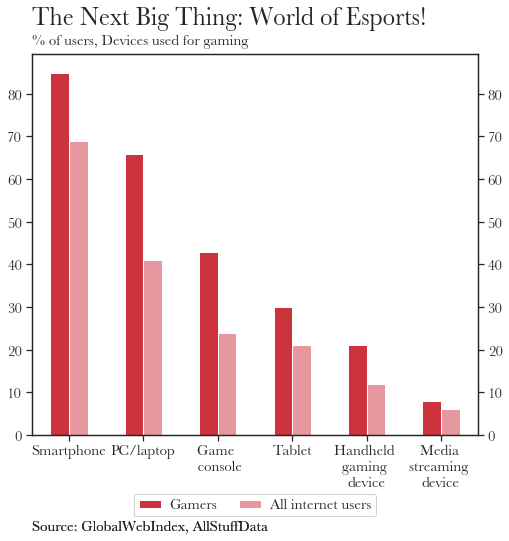

In [68]:
colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.plot.bar(rot=0, ax=ax,color=colors)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Devices used for gaming",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = '../todays_chart/sat_01.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [61]:
no_of_devices = {
    '0': [10,],
    '1': [17,25],
    '2': [12,30],
    '3': [7,22],
    '4': [6,23],
}

In [62]:
df = pd.DataFrame.from_dict(no_of_devices, orient='index',columns=[ 'All internet users','Gamers',])
df

,All internet users,Gamers
0,10,NaN
1,17,25.0
2,12,30.0
3,7,22.0
4,6,23.0


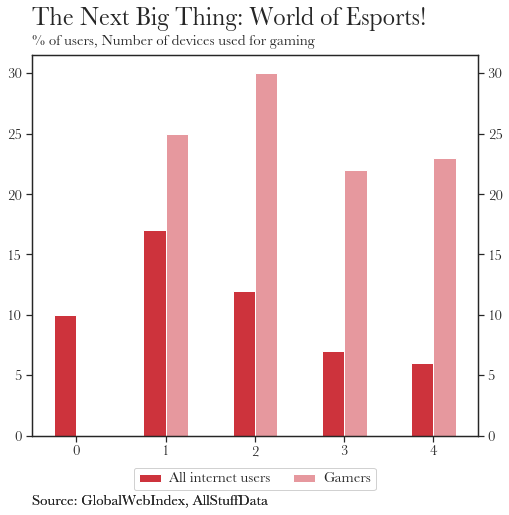

In [64]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.07),
    'ncol': 3,
}

footnote_params = {
    'xy': (0,-0.09),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}

# colors = [pal1[2],pal1[3]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.plot.bar(rot=0, ax=ax,color=colors)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Number of devices used for gaming",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
# f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_02.jpg'
f = '../todays_chart/sat_02.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [18]:
yearwise = {
    '2015': [66,63,30],
    '2016': [63,64,29],
    '2017': [53,64,23],
    '2018': [48,67,23],
    '2019': [45,71,27],
}

In [19]:
df = pd.DataFrame.from_dict(yearwise, orient='index',columns=['PC/laptop', 'Smartphone','Games console'])
df = df[['Smartphone','PC/laptop', 'Games console']]
df

,Smartphone,PC/laptop,Games console
2015,63,66,30
2016,64,63,29
2017,64,53,23
2018,67,48,23
2019,71,45,27


In [20]:

pal1 = sns.color_palette([
        [230 / 255, 152 / 255, 158 / 255], #Light Red
        [205 / 255, 51 / 255, 60 / 255], #Red
        [157 / 255, 187 / 255, 226 / 255], #Light Blue
        [51 / 255, 103 / 255, 171 / 255], #Blue
#         [153 / 255, 255 / 255, 153 / 255], #Light Green
#         [0 / 255, 179 / 255, 98 / 255], #Green
#         [0 / 255, 51 / 255, 28 / 255], #Green

])

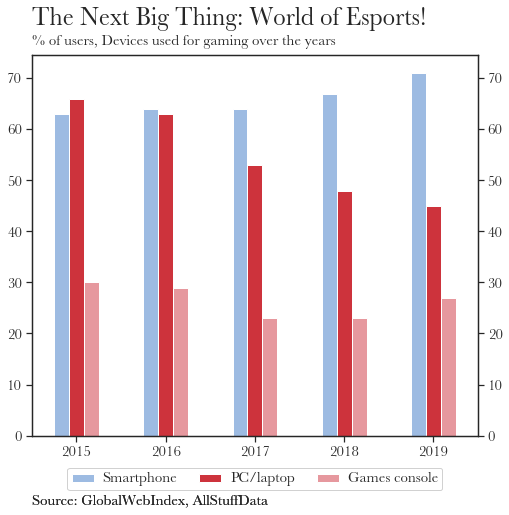

In [21]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.07),
    'ncol': 3,
}

footnote_params = {
    'xy': (0,-0.09),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[2],pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.plot.bar(rot=0, ax=ax,color=colors)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Devices used for gaming over the years",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
# f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_03.jpg'
f = '../todays_chart/sat_03.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [22]:
gender = {
    'Male': [83,69,47,29],
    'Female': [79,69,35,21],
}

In [23]:
df = pd.DataFrame.from_dict(gender, orient='index',columns=['Any', 'Smartphone','PC/laptop','Games console'])
df

,Any,Smartphone,PC/laptop,Games console
Male,83,69,47,29
Female,79,69,35,21


In [24]:
pal1 = sns.color_palette([
#         [230 / 255, 152 / 255, 158 / 255], #Light Red
#         [205 / 255, 51 / 255, 60 / 255], #Red
        [157 / 255, 187 / 255, 226 / 255], #Light Blue
        [51 / 255, 103 / 255, 171 / 255], #Blue
#         [153 / 255, 255 / 255, 153 / 255], #Light Green
#         [0 / 255, 179 / 255, 98 / 255], #Green
#         [0 / 255, 51 / 255, 28 / 255], #Green

])

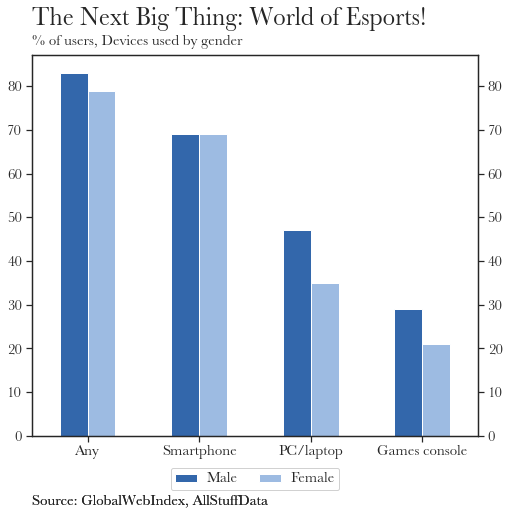

In [25]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.07),
    'ncol': 3,
}

footnote_params = {
    'xy': (0,-0.09),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.T.plot.bar(rot=0, ax=ax,color=colors)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Devices used by gender",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
# f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_04.jpg'
f = '../todays_chart/sat_04.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [34]:
age = {
    '16-24': [91,79,50,28],
    '25-34': [87,76,46,30],
    '35-44': [83,71,40,28],
    '45-54': [71,57,33,18],
    '55-64': [58,42,25,11],
}

In [35]:
df = pd.DataFrame.from_dict(age, orient='index',columns=['Any', 'Smartphone','PC/laptop','Games console'])
df

,Any,Smartphone,PC/laptop,Games console
16-24,91,79,50,28
25-34,87,76,46,30
35-44,83,71,40,28
45-54,71,57,33,18
55-64,58,42,25,11


In [36]:
pal1 = sns.color_palette([
        [230 / 255, 152 / 255, 158 / 255], #Light Red
        [205 / 255, 51 / 255, 60 / 255], #Red
#         [157 / 255, 187 / 255, 226 / 255], #Light Blue
#         [51 / 255, 103 / 255, 171 / 255], #Blue
#         [153 / 255, 255 / 255, 153 / 255], #Light Green
#         [0 / 255, 179 / 255, 98 / 255], #Green
#         [0 / 255, 51 / 255, 28 / 255], #Green

])

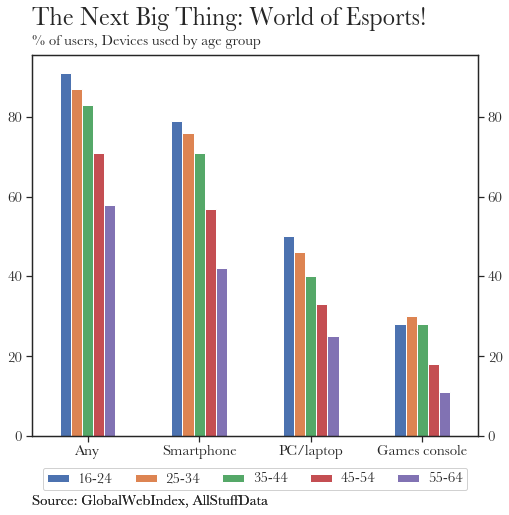

In [37]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.07),
    'ncol': 5,
}

footnote_params = {
    'xy': (0,-0.09),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.T.plot.bar(rot=0, ax=ax,)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Devices used by age group",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
# f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_05.jpg'
f = '../todays_chart/sat_05.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [38]:
income = {
    'Bottom 25%': [24,24,23,20],
    'Mid 50%': [48,49,49,48],
    'Top 25%': [21,21,22,27],
    'Prefer not to say': [7,6,6,5],
}

In [39]:
df = pd.DataFrame.from_dict(income, orient='index',columns=['Any', 'Smartphone','PC/laptop','Games console'])
df

,Any,Smartphone,PC/laptop,Games console
Bottom 25%,24,24,23,20
Mid 50%,48,49,49,48
Top 25%,21,21,22,27
Prefer not to say,7,6,6,5


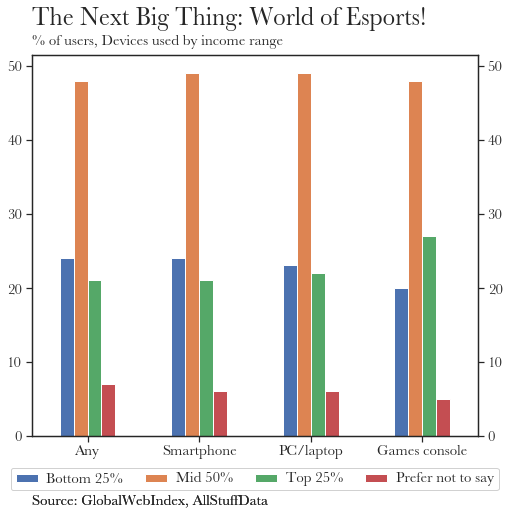

In [41]:
SAVEFIG_KWARGS = {'dpi': 1200}
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.07),
    'ncol': 5,
}

footnote_params = {
    'xy': (0,-0.09),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.T.plot.bar(rot=0, ax=ax,)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Devices used by income range",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
# f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_06.jpg'
f = '../todays_chart/sat_06.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [42]:
esports = {
    'Watched a \nlive gaming \nstream': [41,35,30,21,11],
    'Watched\nan esports\ntournament': [27,26,19,17,9],
    'Broadcast\na live stream\n of your gameplay': [8,10,9,7,2],
}

In [43]:
df = pd.DataFrame.from_dict(esports, orient='index',columns=['16-24', '25-34','35-44','45-54','55-64'])
df

,16-24,25-34,35-44,45-54,55-64
Watched a \nlive gaming \nstream,41,35,30,21,11
Watched\nan esports\ntournament,27,26,19,17,9
Broadcast\na live stream\n of your gameplay,8,10,9,7,2


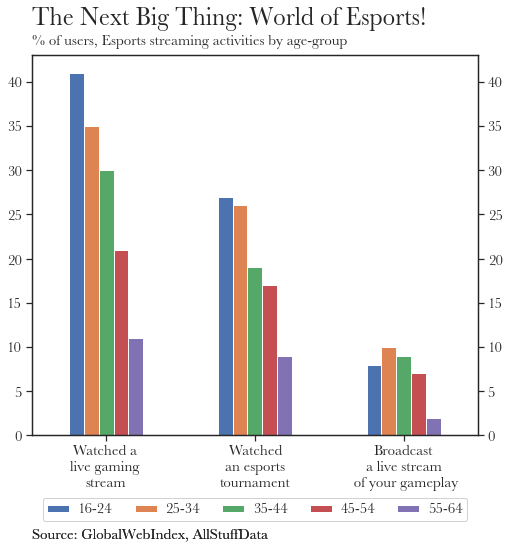

In [44]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.15),
    'ncol': 5,
}

footnote_params = {
    'xy': (0,-0.18),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.plot.bar(rot=0, ax=ax,)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Esports streaming activities by age-group",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_07.jpg'
f = '../todays_chart/sat_07.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [45]:
esports_reg = {
    'Watched a \nlive gaming\n stream': [38,27,31,30,30],
    'Watched \nan esports\n tournament': [30,14,20,14,13],
    'Broadcast a \nlive stream of\n your gameplay': [11,5,7,9,5],
}

In [46]:
df = pd.DataFrame.from_dict(esports_reg, orient='index',columns=['APAC','Europe','Lat Am','MEA','North Am'])
df

,APAC,Europe,Lat Am,MEA,North Am
Watched a \nlive gaming\n stream,38,27,31,30,30
Watched \nan esports\n tournament,30,14,20,14,13
Broadcast a \nlive stream of\n your gameplay,11,5,7,9,5


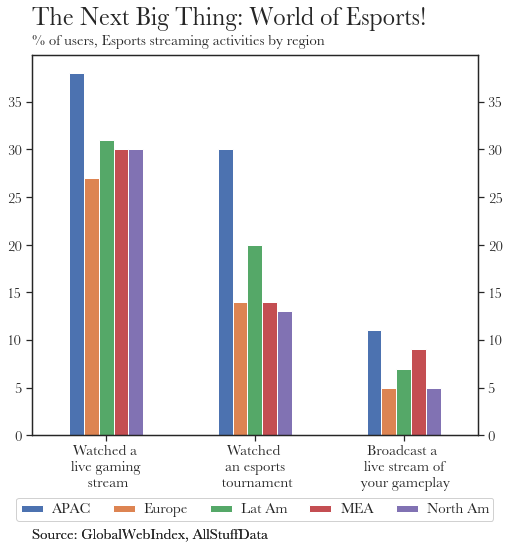

In [47]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.15),
    'ncol': 5,
}

footnote_params = {
    'xy': (0,-0.18),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.plot.bar(rot=0, ax=ax,)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Esports streaming activities by region",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_08.jpg'
f = '../todays_chart/sat_08.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [48]:
battle_royal = {
    'APAC': [10,16,17],
    'Europe': [9,19,32],
    'Lat Am': [10,32,10],
    'MEA': [8,23,7],
    'North Am': [13,24,9],
}

In [49]:
df = pd.DataFrame.from_dict(battle_royal, orient='index',columns=['Apex legends','Fortnite','PUBG'])
df

,Apex legends,Fortnite,PUBG
APAC,10,16,17
Europe,9,19,32
Lat Am,10,32,10
MEA,8,23,7
North Am,13,24,9


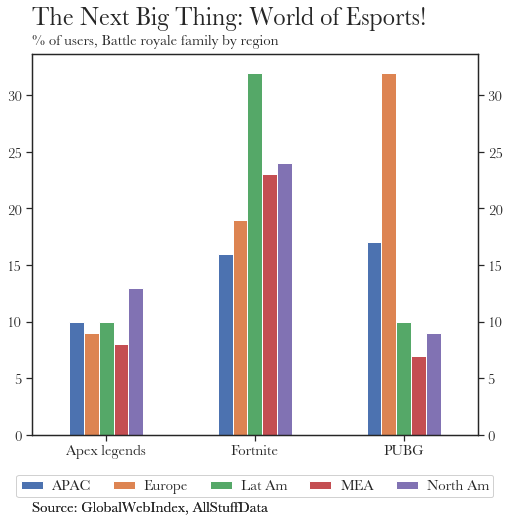

In [50]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.09),
    'ncol': 5,
}

footnote_params = {
    'xy': (0,-0.11),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.T.plot.bar(rot=0, ax=ax,)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Battle royale family by region",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_09.jpg'
f = '../todays_chart/sat_09.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [51]:
battle_royal_age = {
    '16-24': [48,47,52],
    '25-34': [30,30,31],
    '35-44': [16,16,11],
    '45-54': [5,6,5],
    '55-64': [1,1,1],
}

In [52]:
df = pd.DataFrame.from_dict(battle_royal_age, orient='index',columns=['Apex legends','Fortnite','PUBG'])
df

,Apex legends,Fortnite,PUBG
16-24,48,47,52
25-34,30,30,31
35-44,16,16,11
45-54,5,6,5
55-64,1,1,1


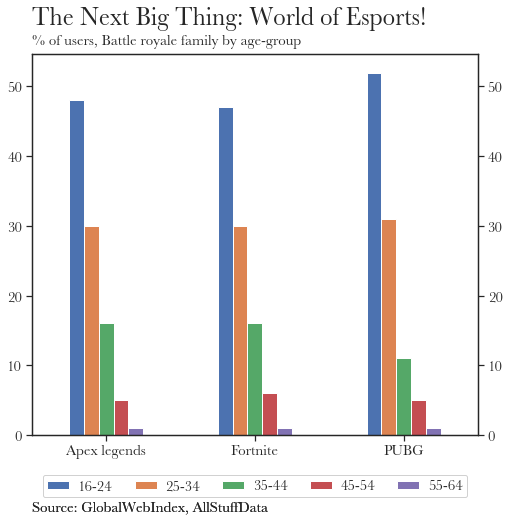

In [53]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.09),
    'ncol': 5,
}

footnote_params = {
    'xy': (0,-0.11),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.T.plot.bar(rot=0, ax=ax,)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Battle royale family by age-group",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_10.jpg'
f = '../todays_chart/sat_10.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)

In [54]:
battle_royal_gender = {
    'Male': [74,72,79],
    'Female': [26,28,21],
}

In [55]:
df = pd.DataFrame.from_dict(battle_royal_gender, orient='index',columns=['Apex legends','Fortnite','PUBG'])
df

,Apex legends,Fortnite,PUBG
Male,74,72,79
Female,26,28,21


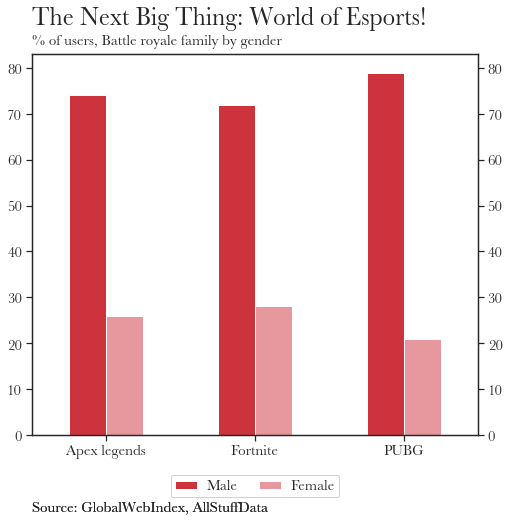

In [56]:
legend_placement_kwargs = {
    'loc': 'upper center',
    'bbox_to_anchor': (.5,-0.09),
    'ncol': 5,
}

footnote_params = {
    'xy': (0,-0.11),
    'xycoords':'axes fraction',
    'xytext': (0,-24),
    'textcoords': 'offset points',
    'va': 'top',
    
}


colors = [pal1[1],pal1[0]]
fig, ax = plt.subplots(figsize=(8,7))
ax = df.T.plot.bar(rot=0, ax=ax, color=colors)
ax.set_title('The Next Big Thing: World of Esports!', loc=CHART_TITLE_ALIGN, \
             fontdict={'fontsize':25,'fontweight':'bold', 'fontname':'Baskerville'}, pad=30 )
ax.legend(**LEGEND_KWARGS,**legend_placement_kwargs)
fig.text(0.125,0.9,"% of users, Battle royale family by gender",fontdict={'fontsize':15,'fontweight':'regular','fontname':'Baskerville'})
ax1 = ax.twinx()
ax1.set_ylim(ax.get_ylim())
footnote_text = "Source: GlobalWebIndex, AllStuffData"
apply_to_axes((ax,ax1),footnote_text = footnote_text)
f = os.path.dirname( os.getcwd()) + '/dailycharts/06-13/sat_11.jpg'
f = '../todays_chart/sat_11.jpg'
fig.savefig(f, **SAVEFIG_KWARGS, **savefig_params, transparent = True)